In [36]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [8]:
# loading the data
bicing_status = pd.read_parquet(r'..\data\processed\bicing_status.parquet')
meteo_stats = pd.read_parquet(r'..\data\processed\meteo_stats.parquet')


In [19]:
bicing_status.sample(5)

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,ctx_1,ctx_2,ctx_3,ctx_4,percentage_docks_available
2167204,74,2020,1,1,3,False,winter,1,1.0,14.0,0.933333,0.933333,0.933333,0.866667,0.933333
14112502,478,2022,9,28,3,False,autumn,2,25.0,5.0,0.233333,0.200000,0.200000,0.206897,0.166667
4504534,150,2021,5,24,1,False,spring,12,16.0,11.0,0.481481,0.481481,0.666667,0.629630,0.407407
7786539,258,2022,12,16,5,False,winter,18,24.0,3.0,0.111111,0.259259,0.259259,0.222222,0.111111
7062116,235,2022,9,10,6,True,autumn,15,6.5,18.5,0.880000,0.920000,0.960000,0.880000,0.740000


In [20]:
meteo_stats.sample(5)

,avg_wind_direction,max_streak_wind_direction,avg_rel_humidity,avg_atm_pressure,acum_precipitation,global_solar_rad,avg_temp,min_temp,max_temp,avg_wind_speed,max_wind_speed,year,month,day
106,81.333336,82.333336,80.00,998.366638,0.000000,21.700001,15.675000,13.875,18.825001,2.533333,6.700000,2020,4,16
7,178.666672,138.666672,76.25,1008.933350,0.000000,8.766666,10.675000,6.775,16.200001,1.400000,6.100000,2020,1,8
140,176.000000,210.000000,63.50,995.266663,0.000000,29.700001,21.950001,17.625,27.225000,2.033333,6.233333,2020,5,20
71,194.333328,129.000000,76.00,999.400024,0.000000,17.666666,14.650000,10.500,20.700001,2.200000,6.966667,2020,3,12
8,253.333328,234.000000,82.50,1005.633362,0.033333,8.266666,10.250000,7.000,14.450000,2.333333,7.766667,2020,1,9


In [17]:
# joining the DataFrames: bicing_status and meteo_stats
bicing = (bicing_status
          .astype({'season': 'category'})   # the files previously saved as .parquet do not keep the dtype='category' (?)
          .merge(meteo_stats, on=['year', 'month', 'day'], how='left', indicator=True, validate='many_to_one')  # many_to_one: the bicing_status DataFrame has one year, month, day line per station_id
)

In [23]:
bicing

,station_id,year,month,day,weekday,weekend,season,hour,num_bikes_available,num_docks_available,...,avg_rel_humidity,avg_atm_pressure,acum_precipitation,global_solar_rad,avg_temp,min_temp,max_temp,avg_wind_speed,max_wind_speed,_merge
0,1,2019,7,1,1,False,summer,4,25.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,1,2019,7,1,1,False,summer,5,21.5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,1,2019,7,1,1,False,summer,6,16.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,1,2019,7,1,1,False,summer,7,9.5,16.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,1,2019,7,1,1,False,summer,8,1.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15116743,529,2021,8,16,1,False,summer,10,198.0,99.0,...,68.5,996.700012,0.0,23.500000,26.049999,23.25,31.299999,3.133333,9.500000,both
15116744,530,2020,8,12,3,False,summer,8,198.0,99.0,...,69.5,993.266663,0.0,21.733334,27.450001,24.65,31.924999,3.033333,9.466666,both
15116745,530,2020,8,12,3,False,summer,9,198.0,99.0,...,69.5,993.266663,0.0,21.733334,27.450001,24.65,31.924999,3.033333,9.466666,both
15116746,530,2020,12,3,4,False,winter,15,198.0,99.0,...,58.0,987.366638,0.0,9.200000,9.000000,5.10,12.750000,4.200000,13.966666,both


In [24]:
bicing.shape

(15116748, 27)

In [21]:
bicing.dtypes

station_id                      uint16
year                            uint16
month                            uint8
day                              uint8
weekday                          uint8
weekend                           bool
season                        category
hour                             uint8
num_bikes_available            float32
num_docks_available            float32
ctx_1                          float32
ctx_2                          float32
ctx_3                          float32
ctx_4                          float32
percentage_docks_available     float32
avg_wind_direction             float32
max_streak_wind_direction      float32
avg_rel_humidity               float32
avg_atm_pressure               float32
acum_precipitation             float32
global_solar_rad               float32
avg_temp                       float32
min_temp                       float32
max_temp                       float32
avg_wind_speed                 float32
max_wind_speed           

In [22]:
bicing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15116748 entries, 0 to 15116747
Data columns (total 27 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   station_id                  uint16  
 1   year                        uint16  
 2   month                       uint8   
 3   day                         uint8   
 4   weekday                     uint8   
 5   weekend                     bool    
 6   season                      category
 7   hour                        uint8   
 8   num_bikes_available         float32 
 9   num_docks_available         float32 
 10  ctx_1                       float32 
 11  ctx_2                       float32 
 12  ctx_3                       float32 
 13  ctx_4                       float32 
 14  percentage_docks_available  float32 
 15  avg_wind_direction          float32 
 16  max_streak_wind_direction   float32 
 17  avg_rel_humidity            float32 
 18  avg_atm_pressure            float32 
 19

In [30]:
(bicing
 .memory_usage(deep=True)
 .pipe(lambda ser: ser/ser.sum()*100)
)

Index                         0.000010
station_id                    2.409637
year                          2.409637
month                         1.204818
day                           1.204818
weekday                       1.204818
weekend                       1.204818
season                        1.204852
hour                          1.204818
num_bikes_available           4.819274
num_docks_available           4.819274
ctx_1                         4.819274
ctx_2                         4.819274
ctx_3                         4.819274
ctx_4                         4.819274
percentage_docks_available    4.819274
avg_wind_direction            4.819274
max_streak_wind_direction     4.819274
avg_rel_humidity              4.819274
avg_atm_pressure              4.819274
acum_precipitation            4.819274
global_solar_rad              4.819274
avg_temp                      4.819274
min_temp                      4.819274
max_temp                      4.819274
avg_wind_speed           

In [25]:
bicing.describe().T

,count,mean,std,min,25%,50%,75%,max
station_id,15116748.0,252.346149,146.081224,1.000000,127.000000,251.000000,375.000000,530.000000
year,15116748.0,2021.073039,1.170434,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,15116748.0,6.614376,3.493727,1.000000,4.000000,7.000000,10.000000,12.000000
day,15116748.0,15.768636,8.782417,1.000000,8.000000,16.000000,23.000000,31.000000
weekday,15116748.0,3.980793,1.992957,1.000000,2.000000,4.000000,6.000000,7.000000
hour,15116748.0,11.571896,6.856760,0.000000,6.000000,12.000000,17.000000,23.000000
num_bikes_available,15116748.0,10.102408,51.842369,1.000000,3.000000,8.500000,15.000000,65535.000000
num_docks_available,15116748.0,15.538657,8.103662,1.000000,9.500000,16.000000,21.000000,99.000000
ctx_1,15116748.0,0.608165,0.279193,0.000275,0.394231,0.653846,0.863636,0.981481
ctx_2,15116748.0,0.608165,0.279193,0.000275,0.394231,0.653846,0.863636,0.981481


In [35]:
(bicing
 .isna()
 .sum()
#  .pipe(lambda ser: ser/ser.sum()*100) # percentage of missing values per column
)

station_id                          0
year                                0
month                               0
day                                 0
weekday                             0
weekend                             0
season                              0
hour                                0
num_bikes_available                 0
num_docks_available                 0
ctx_1                               0
ctx_2                               0
ctx_3                               0
ctx_4                               0
percentage_docks_available          0
avg_wind_direction            1652196
max_streak_wind_direction     1652196
avg_rel_humidity              1652196
avg_atm_pressure              1652196
acum_precipitation            1652196
global_solar_rad              1652196
avg_temp                      1652196
min_temp                      1652196
max_temp                      1652196
avg_wind_speed                1652196
max_wind_speed                1652196
_merge      

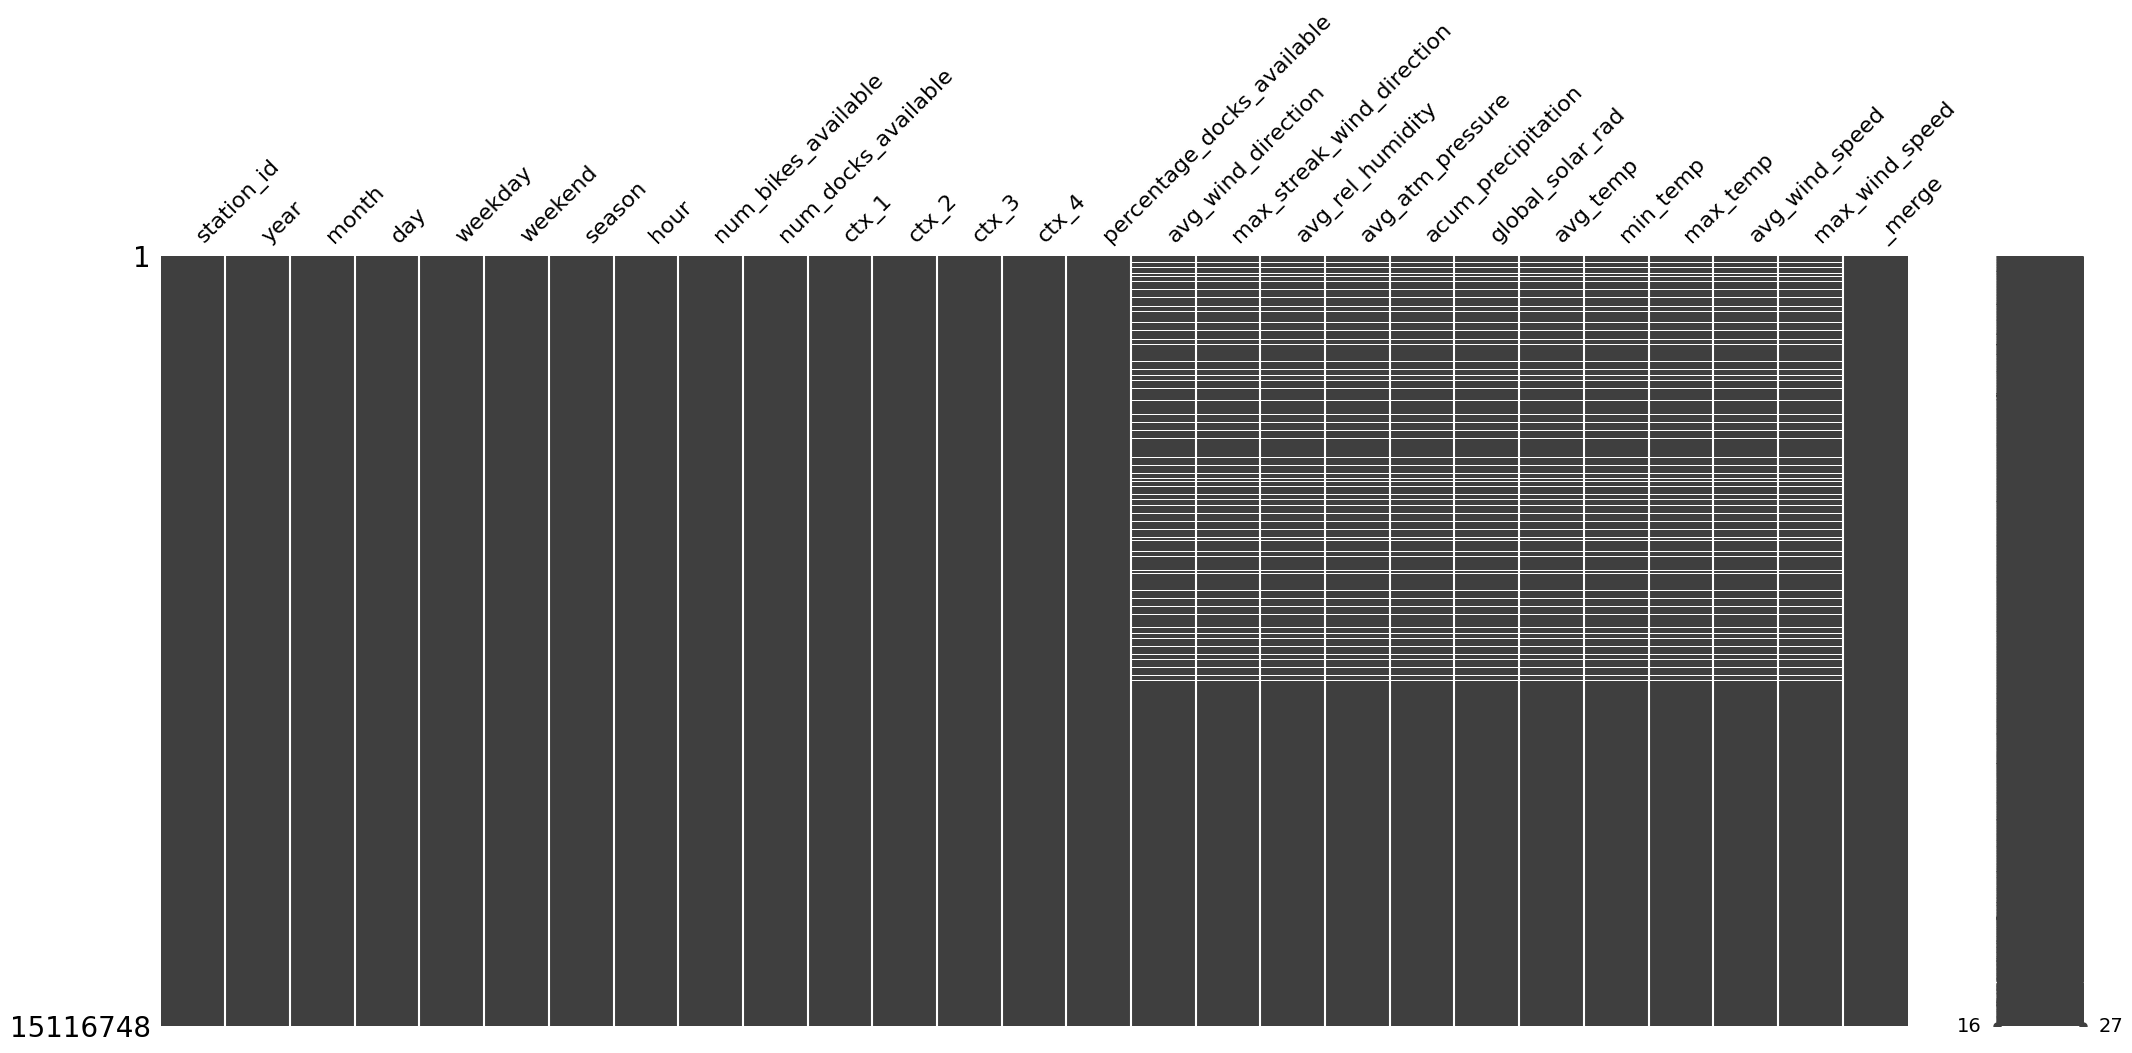

In [37]:
ax = msno.matrix(bicing.sort_values(by=['station_id', 'year', 'month', 'day']))
ax.get_figure().savefig(r'..\reports\figures\jdf_bicing_0101.png')